# GenAI with Python

###### [Article: medium](https://medium.com/towards-data-science/genai-with-python-rag-with-llm-complete-tutorial-c276dda6707b)

## Versión modificada

#### To Do

[ ] Crear una sola función keyword_generator, que reciba dos parámetros adicionales: El modelo a usar y el idioma (ES, EN) para generar las _keywords_

[ ] Renombrar las colecciones existentes para indicar el modelo usado al generar las _keywords_. collection_`deepseek`

[ ] Crear las colecciones de los dos documentos usando `phi-3` para generar las _keywords_

[x] ~~Correr keyword_generator_phi3 para el doc CONPES~~

[x] ~~Crear la colección conpesIA_4144_phi3~~

### Data

In [ ]:
# En un ambiente Mac, usar
# brew install poppler

pages: 126


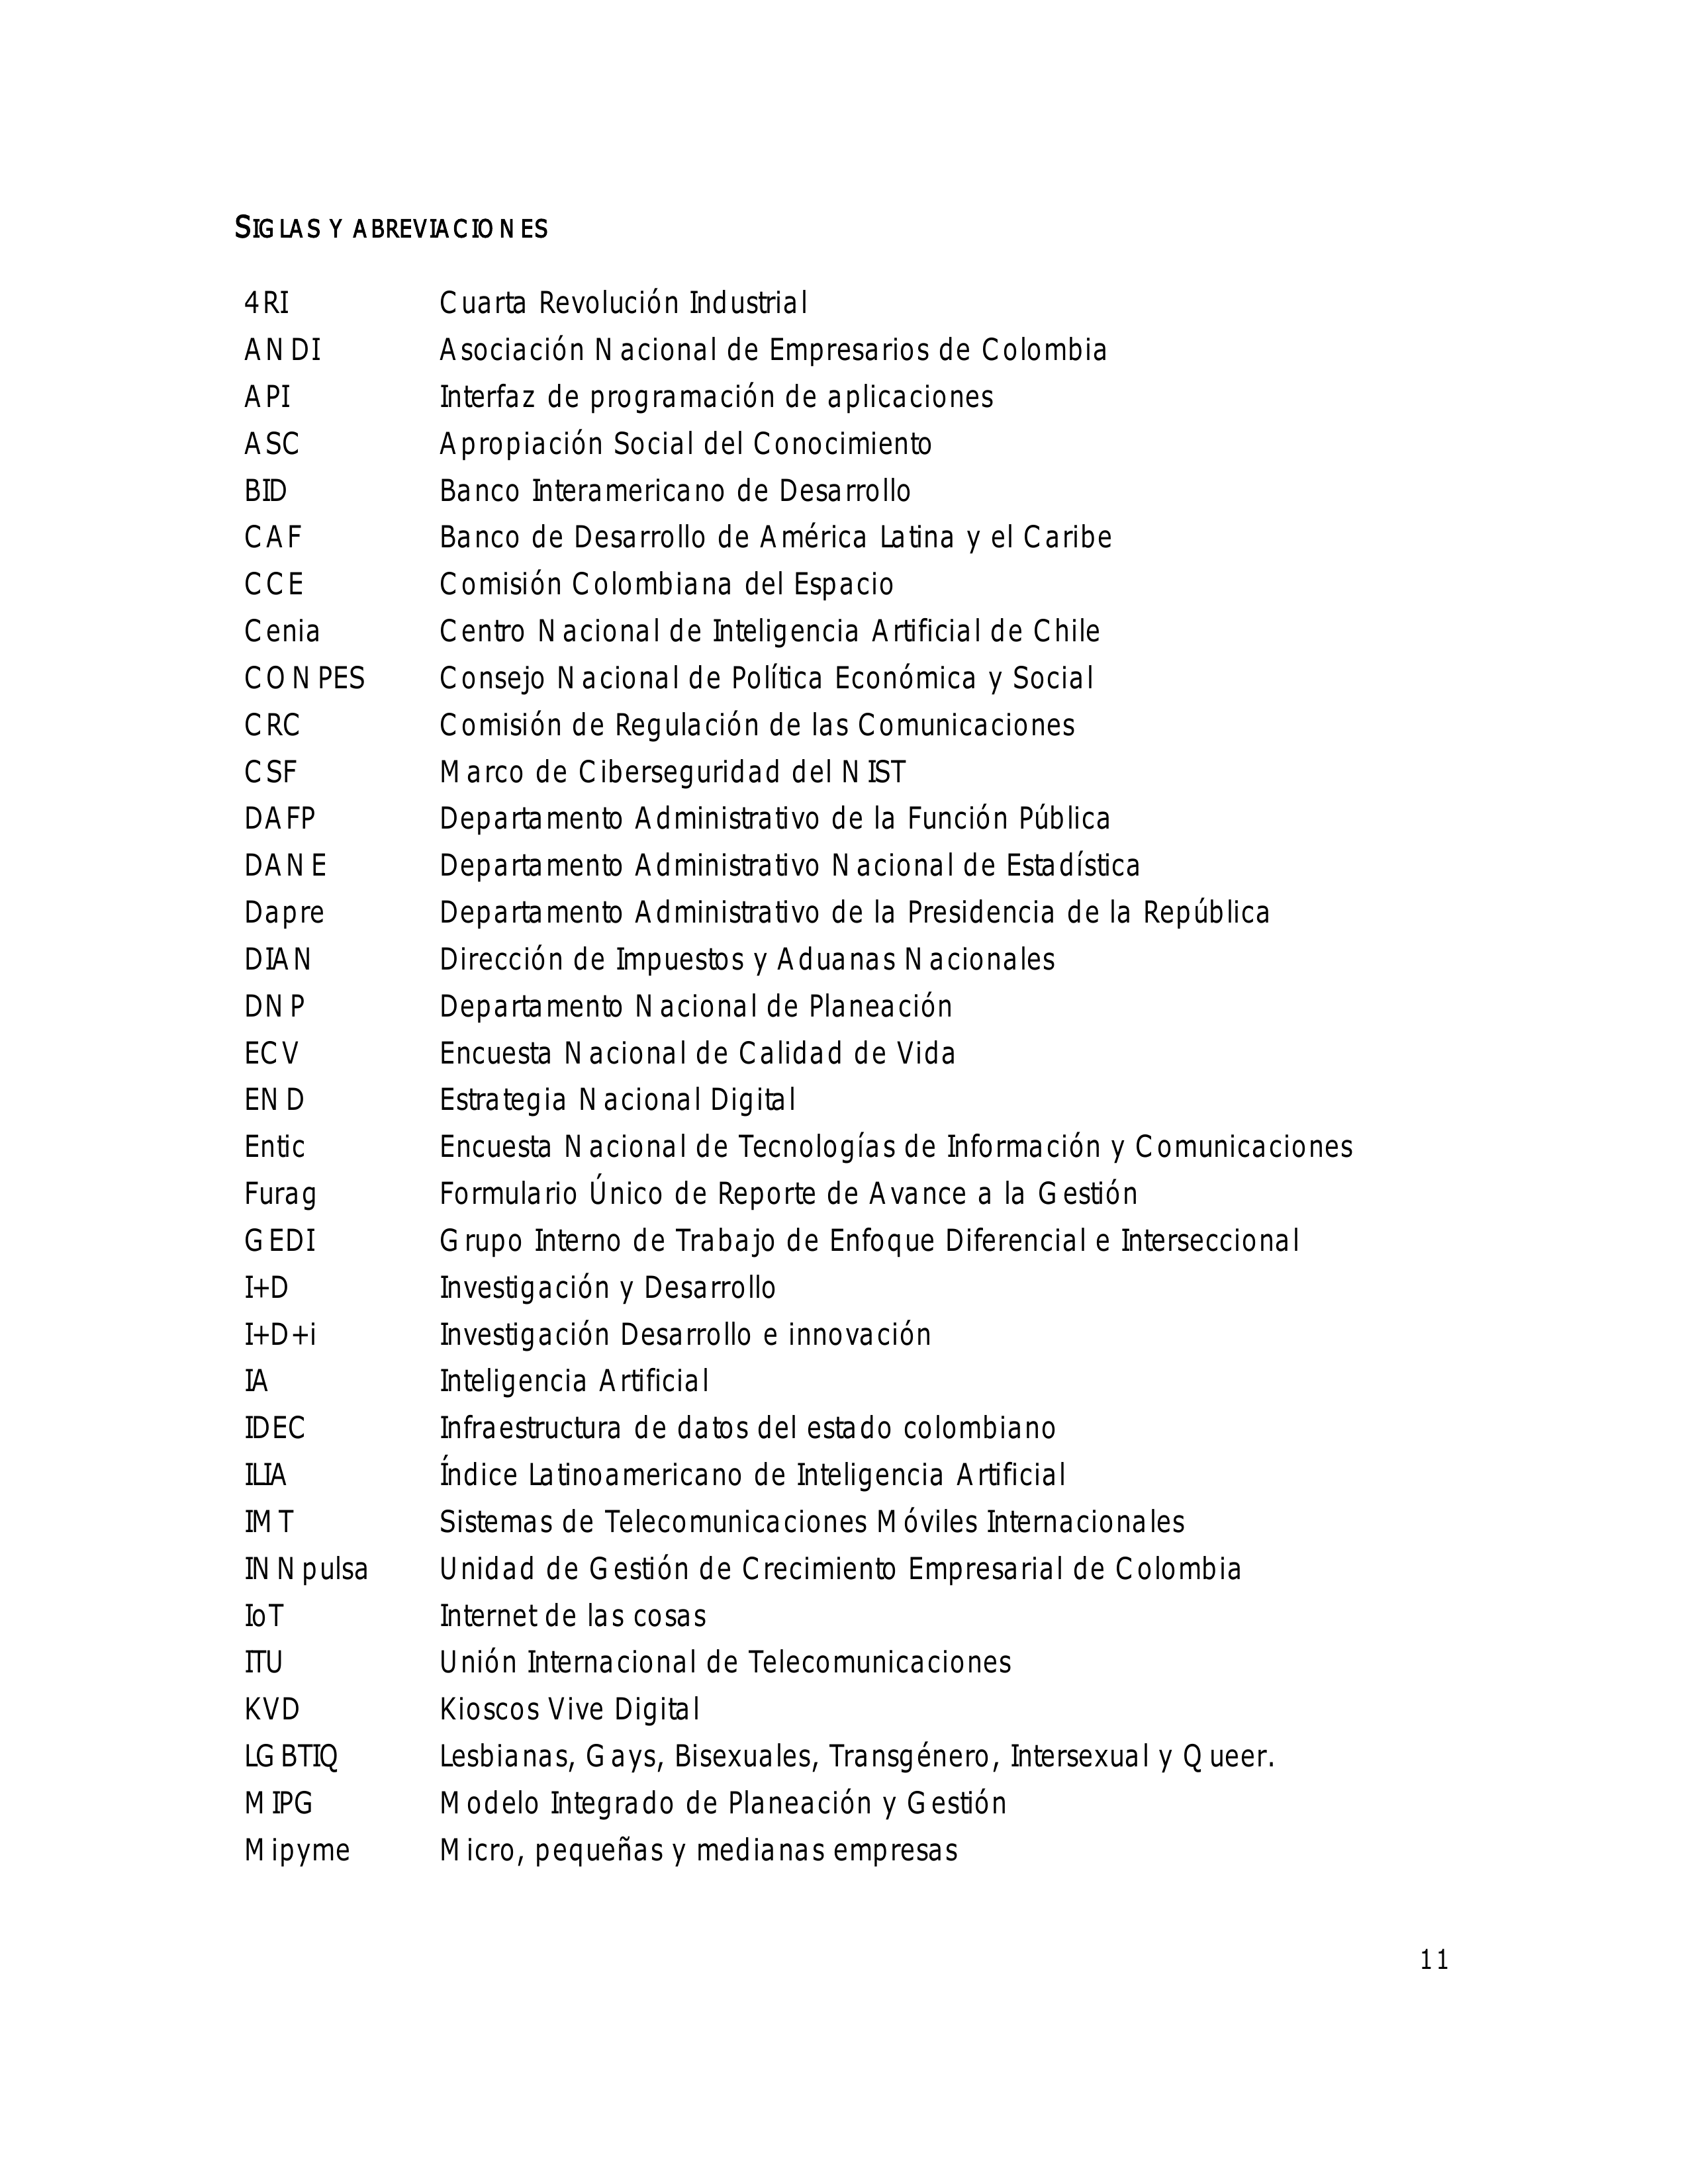

In [ ]:
import pdf2image #1.17.0

# Ensure the path to the PDF file is correct and the file exists
# pdf_path = "data/doc_nvidia.pdf"
pdf_path = "data/CONPES_IA_4144.pdf"
pag = 10 # test page
try:
    doc_img = pdf2image.convert_from_path(pdf_path, dpi=300)
    print("pages:", len(doc_img))
    # Ensure the page index is within the range of available pages
    if len(doc_img) > pag:
        display(doc_img[pag])
    else:
        print(f"The document has fewer than {pag} pages.")
except Exception as e:
    print(f"An error occurred: {e}")

In [52]:
print("pages:", len(doc_img))

pages: 126


In [3]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Además se usó brew install tesseract y brew install tesseract-lang. Así sí funcionó

In [ ]:
import pytesseract #0.3.13
from tqdm.notebook import tqdm

# Ensure the path to the Tesseract executable is correct
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'  # Example for macOS. Depending on the installation, done in the previous cell (brew install tesseract)
# pytesseract.pytesseract.tesseract_cmd = r'/Users/carlos/Docs/projects/GenerativeAI/.venv/bin/pytesseract'  # Example for macOS
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Example for Windows

doc_txt = []

try:
    for page in tqdm(doc_img):
        text = pytesseract.image_to_string(page)
        doc_txt.append(text)
    print(doc_txt[pag])
except pytesseract.TesseractError as e:
    print(f"TesseractError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

  0%|          | 0/126 [00:00<?, ?it/s]

SIGLAS Y ABREVIACIONES

4RI
ANDI
API
ASC
BID
CAF
CCE
Cenia
CON PES
CRC
CSF
DAFP
DANE
Dapre
DIAN
DNP
ECV
EN D
Entic
Furag
GEDI
I+D
1+D +i
IA
IDEC
ILA
IMT

IN N pulsa
loT

ITU
KVD
LG BTIQ
M IPG
Mipyme

Cuarta Revolucion Industria!

Asociacion N acional de Empresarios de Colombia

Interfaz de programacion de aplicaciones

Apropiacion Social del Conocimiento

Banco Interamericano de Desarrollo

Banco de Desarrollo de América Latina y el Caribe

Comision Colombiana del Espacio

Centro Nacional de Inteligencia Artificial de Chile

Consejo Nacional de Politica Economica y Social

Comision de Regulacion de las Comunicaciones

Marco de Ciberseguridad del N IST

Departamento Administrativo de la Funcion Publica
Departamento Administrativo N acional de Estadistica
Departamento Administrativo de la Presidencia de la Republica
Direccidn de Impuestos y Aduanas N acionales

Departamento Nacional de Planeacion

Encuesta N acional de Calidad de Vida

Estrategia N acional Digital

Encuesta N acional de 

In [47]:
print(doc_txt[85])

toma de decisiones y acciones que permitan el uso del espectro como un habilitador de
nuevas tecnologias digitales, entre ellas la Inteligencia Artificial (IA).

El Ministerio de Tecnologias de la Informacion y las Comunicaciones, en el 2025,
definira un instrumento normativo para que los Proveedores de Redes y Servicios de
Telecomunicaciones (PRST) que tienen a su cargo las contraprestaciones por el uso del
espectro diferente a IMT (Telecomunicaciones Moviles Internacionales por sus siglas en
inglés), puedan presentar proyectos de obligaciones de hacer para la prestacion del servicio
de acceso a internet (fijo o movil) para proveer o mejorar la capacidad y calidad del servicio
de Internet como habilitador e impulso del uso y adopcion de sistemas de JA.

La Comision de Regulacion de Comunicaciones, en coordinacion con el Ministerio
de Tecnologias de la Informacion y las Comunicaciones, la Unidad Administrativa
Especial Autoridad N acional de Licencias Ambientales, la Unidad Administrat

### Preprocessing

In [ ]:
# Table of contents of nvidia document
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [4]:
# Table of contents of CONPES document
title_map = {
    "13-16":"Introducción",
    "17-33":"Antecedentes y Justificación",
    "34-40":"Marco Conceptual",
    "41-81":"Diagnóstico",
    "82-108":"Política",
    "109-113":"Recomendaciones"
}

In [48]:
title_map

{'13-16': 'Introducción',
 '17-33': 'Antecedentes y Justificación',
 '34-40': 'Marco Conceptual',
 '41-81': 'Diagnóstico',
 '82-108': 'Política',
 '109-113': 'Recomendaciones'}

In [5]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

628 = 628 = 628


In [6]:
# Print example
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

76_1 - {'title': 'Diagnóstico'} 
 Colombia enfrenta retos estructurales a nivel econdmico y social, para los cuales la
IA representa una oportunidad Unica que no ha sido plenamente aprovechada. El pais
debe potenciar el uso de esta tecnologia en diversos campos para superar el hambre, la
pobreza y la desigualdad, reactivar la economia y alcanzar un desarrollo sostenible. 

76_2 - {'title': 'Diagnóstico'} 
 En el sector agricola, la baja competitividad ha resultado en una oferta exportadora
escasamente diversificada, mientras que la produccion agricola es cada vez mas
vulnerable a los efectos del cambio climatico; esto exige buscar maneras de hacer la
produccion mas sostenible mediante el uso de la tecnologia. De acuerdo con el Plan
Estratégico sectorial 2022-2026 del Ministerio de Agricultura y Desarrollo Rural, las
exportaciones de bienes agropecuarios representan un 21 % del total de las exportaciones
del pais, menos de la mitad de lo que aportan los combustibles y las industrias ext

### LLM Generator

#### TEXT

In [ ]:
import ollama #0.2.1

def keyword_generator(p, top=3, model_selected="phi3", lang="en"):
    if lang == "en":
        prompt = f"summarize the following paragraph in {top} keywords separated by ,: {p}"
    elif lang == "es":
        prompt = f"Resuma el siguiente párrafo en {top} conceptos clave separados por ,: {p}"
    else:
        prompt = f"summarize the following paragraph in {top} keywords separated by ,: {p}"  # Default to English if language is not recognized
    
    res = ollama.generate(model=model_selected, prompt=prompt)["response"]
    # Remove the analysis part delimited by <think> and </think>
    if "<think>" in res and "</think>" in res:
        res = res.split("<think>")[0] + res.split("</think>")[-1]
    return res.replace("\n"," ").strip()


Summary using deepseek-r1:1.5b model:
 NVIDIA GPU, professional artists/architects/designers, generative AI


##### Using `deepseek`

ALGO le pasa con el español (u otro idioma diferente al Inglés). La respuesta la da en inglés.

Al ser más específico pidiendo la respuesta en español, hace el análisis en inglés y traduce la respuesta a español. Al pedirle la respuesta en francés no funcionó en una primera instancia, en una segunda ejecución sí funcionó

In [ ]:
import ollama #0.2.1

def keyword_generator_deepseek(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
#    prompt = "Resuma el siguiente párrafo en 3 conceptos clave separados por , : "+p ## ALGO le pasa con el español. La respuesta la da en inglés
#    # Example usage of the deepseek-r1:1.5b model
#    # prompt = "Generate a summary for the following text: " + p
    res = ollama.generate(model="deepseek-r1:1.5b", prompt=prompt)["response"]
    # Remove the analysis part delimited by <think> and </think>
    if "<think>" in res and "</think>" in res:
        res = res.split("<think>")[0] + res.split("</think>")[-1]
    return res.replace("\n"," ").strip()


Summary using deepseek-r1:1.5b model:
 NVIDIA GPU, professional artists/architects/designers, generative AI


In [ ]:
# Con un párrafo del documento de nvidia
p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print("Summary using deepseek-r1:1.5b model:\n", keyword_generator_deepseek(p))


In [ ]:
# Con un párrafo del documento CONPES
p = '''En el sector salud, las barreras de oferta relacionadas con la calidad del servicio,
la oportunidad de las citas y los trámites excesivos afectan especialmente a las zonas
apartadas. Un informe del Consejo Privado de Competitividad (Consejo Privado de
Competitividad, 2021) señala que, en 2019, el 26% de las personas no recibió o solicitó
atención médica debido a problemas como la oportunidad de la cita, la calidad del servicio,
la ubicación geográfica del centro de atención o la cantidad de trámites. Estas barreras son
más pronunciadas en las zonas rurales, donde la infraestructura y la disponibilidad de
servicios de salud son limitadas. La Encuesta de Calidad de Vida (DANE, 2023) también
refleja que uno de cada cinco pacientes reportó inconvenientes para acceder al sistema de
salud, citando dificultades como la oportunidad de la cita, la calidad del servicio y la
cantidad de trámites. En este contexto, el uso de la IA se presenta como una solución potencial
para mejorar la eficiencia logística del sistema de salud en Colombia.'''
print("Summary using deepseek-r1:1.5b model:\n", keyword_generator_deepseek(p))


Summary using deepseek-r1:1.5b model:
 En el sector de salud, los tres conceptos clave son:  1. ** quality of care:** Las barreras relacionadas con la calidad del servicio, como la falta de suficiente equilibrada en el acceso y la eficiencia logística de las atenciónes.  2. ** access barriers:** La oportunidad de cita y el trámites excesivos afectan especialmente a las zonas rurales, donde la infraestructura y los servicios de salud son limitadas.  3. ** technical inefficiencies:** Los tráites como la ubicación geográfica del centro de atención y la cantidad de trámites pueden desaparecer y resultar en barrieros para los pacientes.  Estos conceptos destacan las desigualdades descriptas en el contexto del informe de la Consejo Privado de Competitividad (2021), que señala la necesidad de soluciones potenciales, como la IA, para mejorar la eficiencia logística del sistema de salud en Colombia.


##### Using `phi3`
La respuesta sí la puede dar en otro idioma auncuando el prompt esté en inglés, por ejemplo. Funcionó con español, francés, alemán e italiano al tiempo, ...

In [60]:
import ollama #0.2.1

def keyword_generator_phi3(p, top=3):
    #prompt = "summarize the following paragraph in 3 keywords separated by , "+p
    prompt = "Resuma el siguiente párrafo en 3 conceptos clave separados por , : "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]

    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

In [ ]:
# Con un párrafo del documento de nvidia
p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print("Summary using phi3 model:\n", keyword_generator_phi3(p))

In [ ]:
# Con un párrafo del documento CONPES
p = '''En el sector salud, las barreras de oferta relacionadas con la calidad del servicio,
la oportunidad de las citas y los trámites excesivos afectan especialmente a las zonas
apartadas. Un informe del Consejo Privado de Competitividad (Consejo Privado de
Competitividad, 2021) señala que, en 2019, el 26% de las personas no recibió o solicitó
atención médica debido a problemas como la oportunidad de la cita, la calidad del servicio,
la ubicación geográfica del centro de atención o la cantidad de trámites. Estas barreras son
más pronunciadas en las zonas rurales, donde la infraestructura y la disponibilidad de
servicios de salud son limitadas. La Encuesta de Calidad de Vida (DANE, 2023) también
refleja que uno de cada cinco pacientes reportó inconvenientes para acceder al sistema de
salud, citando dificultades como la oportunidad de la cita, la calidad del servicio y la
cantidad de trámites. En este contexto, el uso de la IA se presenta como una solución potencial
para mejorar la eficiencia logística del sistema de salud en Colombia.'''
print("Summary using phi3 model:\n", keyword_generator_phi3(p))

Summary using phi3 model:
 1) Las barreras al acceso a servicios médicos incluyen problemas con la calidad del servicio y oportunidades de citas insuficientes, afectando especialmente las zonas rurales; el informe Consejo Privado de Competitividad (2021) destaca que un 26% no recibió atención médica por estas razones en 2019. 2) La Encuesta DANE (2023), refleja que el 20% de los pacientes reportó dificultades para acceder al sistema de salud; las barreras más pronunciadas son la oportunidad y calidad del servicio, junto con la ubicación geográfica. 3) La inteligencia artificial se propone como una solución potencial para optimizar la eficiencia logística en el sector sanitario de Colombia.


##### Summary using `deepseek-r1:1.5b` model:

 <think> Okay, I need to help the user summarize a paragraph into three keywords separated by commas. The original text talks about professional artists, architects, and designers using NVIDIA's GPU-accelerated software platform for creative and design tasks. There are also mentions of generative AI expanding the market for GPUs with enterprise customers developing applications on-premises.  First, I should identify the main elements here. The key points are NVIDIA's partnership products, GPU acceleration for various projects, the use cases mentioned (like movies and buildings), and the role of generative AI in supporting this technology across enterprises.  I need to capture each unique aspect without getting too wordy. "NVIDIA GPU-accelerated software platform" seems to be a primary keyword since it's the technology being used. Then, "creative and design applications" because that's one of the use cases they mentioned. Lastly, the part about generative AI expanding GPUs on-premises is another important point.  Putting them together in three clear keywords: NVIDIA GPU-accelerated software platform, creative and design applications, and generative AI's role. I should make sure each keyword stands out without losing any key information from the paragraph. </think>  NVIDIA GPU-accelerated software platform, creative and design applications, generative AI's role in expanding GPUs market on-premises

##### Summary using `Phi3` model:

NVIDIA Partner Products, Creative Industries, Generative AI Expansion  (Note: The keywords reflect professional artists' use cases for creativity in movies or designing buildings/products using NVIDIA partner products and GPU accelerated software platforms; additionally the paragraph also mentions that generative Al is expanding market demand specifically with enterprise customers developing on-premises applications, thus all three terms are relevant.)

In [ ]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc, model_selected="phi3", lang="es")

0it [00:00, ?it/s]

##### Keyword Generator Time Table
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Files and Models</title>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 20px auto;
            text-align: center;
        }
        th, td {
            border: 1px solid #000;
            padding: 10px;
        }
        th {
            background-color: #040404;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>File</th>
                <th>Model</th>
                <th>Time</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>doc_nvidia.pdf</td>
                <td>deepseek-r1:1.5b</td>
                <td>5+ hrs</td>
            </tr>
            <tr>
                <td>CONPES_IA_4144.pdf</td>
                <td>deepseek-r1:1.5b</td>
                <td>4:46:34</td>
            </tr>
            <tr>
                <td>doc_nvidia.pdf</td>
                <td>Phi-3</td>
                <td><!-- Tiempo aquí --></td>
            </tr>
            <tr>
                <td>CONPES_IA_4144.pdf</td>
                <td>Phi-3</td>
                <td>8:36:33</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


In [61]:
## ORIGINAL
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator_phi3(doc) 

0it [00:00, ?it/s]

In [75]:
print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

628 = 628 = 628


In [62]:
lst_metadata[150]

{'title': 'Marco Conceptual',
 'keywords': '- Teoría sistemática e integral de valores normativos para IA; - Enfoque multicultural, evolutivo y global que guíe el uso responsable del impacto de las TIC en personas, sociedades, medio ambiente y tecnologías emergentes como la JI o AI;  - Base ética dinámicamente aplicada para evaluar e orientar normativamente IA basándose en humanismo.'}

In [67]:
lst_docs[100]

'Colombia cuenta con el Documento CON PES 4080 Politica Publica de\nEquidad de Género para las Mujeres: Hacia el Desarrollo Sostenible del Pais*® de 2022,\nel cual tiene como objetivo fortalecer la institucionalidad para la transversalizacion del\nenfoque de género para las mujeres en asuntos estratégicos del Estado y transformacion\ncultural, frente a cierre de brechas digitales y mitigacion de los sesgos en su uso.\nAdicionalmente, el pais cuenta con normativa que aborda especificamente la igualdad de\ngénero y la proteccion de los derechos de las mujeres (Ley 823 de 2003* asi como la Ley\n2117 de 202172). No obstante, a pesar de estos avances normativos y de politica publica,\nse hace necesario promover el involucramiento de poblaciones diversas en el desarrollo y\nadopcion de la IA.'

In [68]:
lst_ids[100]

'29_3'

In [69]:
## Print example
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

76_1 - {'title': 'Diagnóstico', 'keywords': 'Desafíos estructurales socioeconómicos que Colombia debe abordar: Hambre, pobreza y desigualdad; Uso insuficiente de IA como oportunidad única para solucionar dichos problemas y potenciar el crecimiento económico. Objetivo final del texto original: El fortalecimiento de la economía a través de la implementación amplia e innovadora de tecnologías que permitan un desarrollo sostenible en Colombia, superando así sus retos estructurales actuales.'} 
 Colombia enfrenta retos estructurales a nivel econdmico y social, para los cuales la
IA representa una oportunidad Unica que no ha sido plenamente aprovechada. El pais
debe potenciar el uso de esta tecnologia en diversos campos para superar el hambre, la
pobreza y la desigualdad, reactivar la economia y alcanzar un desarrollo sostenible. 

76_2 - {'title': 'Diagnóstico', 'keywords': 'Competitividad agrícola baja, vulnerabilidad al cambio climático, sostenibilidad con tecnología e inteligencia artifi

#### TABLE

In [24]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 The table compares the financial results for two consecutive years, ending on January 28 and Jan. 29 of each respective year (Jan 2024 versus Jan. 2023). Revenue has surged by 126%, from $26,974 million to $60,922 million. Gross margin also increased substantially, up 15.8 percentage points from 56.9% to 72.7%. Despite a marginal increase of only 2% in operating expenses (from $11,132 million to $11,329 million), the company's operating income saw an incredible rise by 681%, from $4,224 million to $32,972 million. Net income followed a similar trend with a substantial increase of 581% (from $4,368 million to $29,760 million). When it comes to n

In [ ]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

#### IMAGES

Matplotlib is building the font cache; this may take a moment.


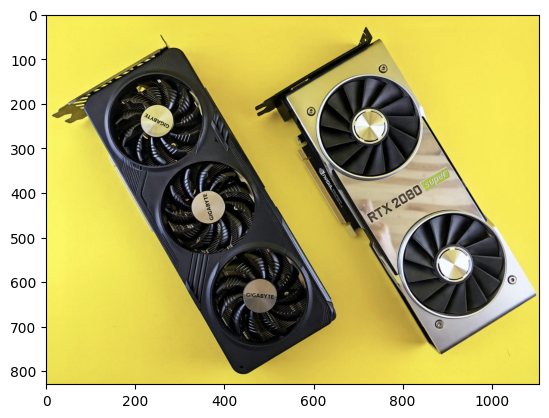

In [17]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [18]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [19]:
prompt = "describe the image"
res = ollama.generate(model="phi3", prompt=prompt, images=[img])["response"]
print(res)

The image depicts a serene sunset over a mountain lake. The sky is painted with warm colors, transitioning from vibrant oranges to deep purples and red hues at the edges where light fades into darkness. A small boat gently bobs on the water's surface amidst ripples caused by an occasional leaf falling onto it. In the foreground lies a dense coniferous forest, its silhouette outlined against the backdrop of dusk sky with faint wisps of mist rolling over nearby hills and creating shadowy patterns around trees that rise in front of the descending sun. The overall mood conveyed is one of tranquility and natural beauty as day turns into night amidst this picturesque landscape.

[img-1]


In [ ]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

#### PLOTS

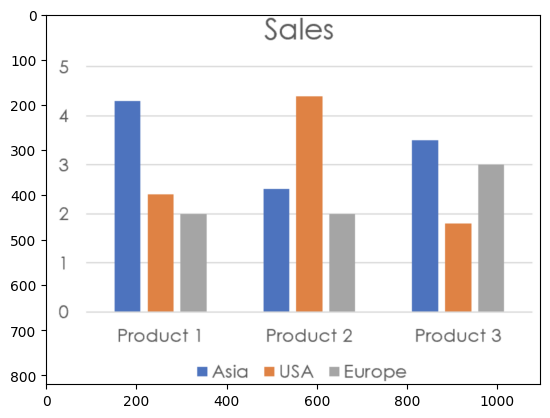

In [50]:
image_file = "data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [ ]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

### Database

In [1]:
import chromadb #0.5.0

db = chromadb.PersistentClient(path="/Users/carlos/Docs/projects/GenerativeAI/RAG/chroma")
db.list_collections()

[Collection(name=conpesIA_4144),
 Collection(name=nvidia),
 Collection(name=conpesIA_4144_phi3)]

---
Inicio validaciones

In [2]:
db.list_collections()

[Collection(name=conpesIA_4144),
 Collection(name=nvidia),
 Collection(name=conpesIA_4144_phi3)]

In [3]:
db.count_collections()

3

In [66]:
print(f"Chroma DB settings: {chromadb.get_settings()}")

Chroma DB settings: environment='' chroma_api_impl='chromadb.api.segment.SegmentAPI' chroma_server_nofile=None chroma_server_thread_pool_size=40 tenant_id='default' topic_namespace='default' chroma_server_host=None chroma_server_headers=None chroma_server_http_port=None chroma_server_ssl_enabled=False chroma_server_ssl_verify=None chroma_server_api_default_path='/api/v1' chroma_server_cors_allow_origins=[] is_persistent=False persist_directory='./chroma' chroma_memory_limit_bytes=0 chroma_segment_cache_policy=None allow_reset=False chroma_auth_token_transport_header=None chroma_client_auth_provider=None chroma_client_auth_credentials=None chroma_server_auth_ignore_paths={'/api/v1': ['GET'], '/api/v1/heartbeat': ['GET'], '/api/v1/version': ['GET']} chroma_overwrite_singleton_tenant_database_access_from_auth=False chroma_server_authn_provider=None chroma_server_authn_credentials=None chroma_server_authn_credentials_file=None chroma_server_authz_provider=None chroma_server_authz_config=No

In [63]:
print(f"DB settings: {db.get_settings()}")

Chroma DB settings: environment='' chroma_api_impl='chromadb.api.segment.SegmentAPI' chroma_server_nofile=None chroma_server_thread_pool_size=40 tenant_id='default' topic_namespace='default' chroma_server_host=None chroma_server_headers=None chroma_server_http_port=None chroma_server_ssl_enabled=False chroma_server_ssl_verify=None chroma_server_api_default_path='/api/v1' chroma_server_cors_allow_origins=[] is_persistent=True persist_directory='/Users/carlos/Docs/projects/GenerativeAI/RAG/chroma' chroma_memory_limit_bytes=0 chroma_segment_cache_policy=None allow_reset=False chroma_auth_token_transport_header=None chroma_client_auth_provider=None chroma_client_auth_credentials=None chroma_server_auth_ignore_paths={'/api/v1': ['GET'], '/api/v1/heartbeat': ['GET'], '/api/v1/version': ['GET']} chroma_overwrite_singleton_tenant_database_access_from_auth=False chroma_server_authn_provider=None chroma_server_authn_credentials=None chroma_server_authn_credentials_file=None chroma_server_authz_p

Sugerencia de Copilot para solucionar el error:
Fail: [ONNXRuntimeError] : 1 : FAIL : Non-zero status code returned while running
CoreML_3403379098192686108_1 node. Name:'CoreMLExecutionProvider_CoreML_3403379098192686108_1_1
' Status Message: Error executing model: Unable to compute the prediction using a neural network model.
It can be an invalid input data or broken/unsupported model (error code: -1).

Con esto lo que se hace es verificar que el modelo ONNX esté bien formado

import onnx

model_path = "path/to/your/model.onnx" # El problema es que no tengo un archivo .onnx
model = onnx.load(model_path)
onnx.checker.check_model(model)]

Sugerencia de ChatGPT para solucionar el error:

import onnxruntime as ort

El problema es que no tengo un archivo .onnx

session = ort.InferenceSession('path_to_model.onnx', providers=['CPUExecutionProvider'])

In [ ]:
# Verificar los proveedores disponibles en la máquina
import onnxruntime as ort

print(f"Available providers: {ort.get_available_providers()}")
print(f"Get Device: {ort.get_device()}")
print(f"Build Info: {ort.get_build_info()}")
print(f"All providers: {ort.get_all_providers()}")
print(f"Version string: {ort.get_version_string()}")
#print(f"Model metadata: {ort.ort.ModelMetadata()}")

Available providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Get Device: CPU
Buil Info: ORT Build Info: git-branch=HEAD, git-commit-id=5c1b7ccbff, build type=Release, cmake cxx flags: -DNDEBUG -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -fstack-protector-strong -O3 -pipe -ffunction-sections -fdata-sections -fvisibility=hidden -fvisibility-inlines-hidden
All providers: ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'MIGraphXExecutionProvider', 'ROCMExecutionProvider', 'OpenVINOExecutionProvider', 'DnnlExecutionProvider', 'TvmExecutionProvider', 'VitisAIExecutionProvider', 'QNNExecutionProvider', 'NnapiExecutionProvider', 'VSINPUExecutionProvider', 'JsExecutionProvider', 'CoreMLExecutionProvider', 'ArmNNExecutionProvider', 'ACLExecutionProvider', 'DmlExecutionProvider', 'RknpuExecutionProvider', 'WebNNExecutionProvider', 'WebGpuExecutionProvider', 'XnnpackExecutionProvider', 'CANNExecutionProvider', 'AzureExecutionProvider', 'CPUExecuti

In [27]:
print(lst_docs[0])

nombrar solo algunos. Pocas plataformas se han adoptado tan amplia o rapidamente como
esta tecnologia sin una plena comprension de los riesgos asociados.


In [28]:
print(len(lst_docs))

628


In [29]:
print(lst_metadata[0])

{'title': 'Introducción', 'keywords': 'Pocas plataformas se han adoptado de manera tan amplia o tan rápida como esta tecnología sixteen con una luchada exhaustiva del riesgo associado.  1. La presencia rapida de la tecnología en dispositivos móviles y systems de end-users   2. El sesgo de riesgos associado con lackada comprensión general del entorno ambiental   3. La need para adquirir adaptabilidad y manageabilidad en el contexto de la transparencia de los riesgos'}


In [77]:
# conpes con keywords phi-3
print(lst_metadata[0])

{'title': 'Introducción', 'keywords': '1) Esta tecnología ha sido adopteada ampliamente y rápidenera, destacándose su popularidad; 2) A pesar del crecimiento acelerado en la adopción, existen posibles riesgos que aún no han sido completamente comprendidos por las plataformas adoptantes o el público en general;  3) Es crítico identificar y comprender estos riesgos para su implementación responsable.'}


In [30]:
print(lst_ids[0])

13_0


In [78]:
#collection_name = "nvidia"
collection_name = "conpesIA_4144_phi3"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

In [85]:
# Pruebas con el método add
from tqdm.notebook import tqdm

# Inicializar variables para almacenar el último elemento insertado con éxito
last_success_index = -1
last_success_doc = None
last_success_id = None
last_success_metadata = None

try:
    for i in tqdm(range(len(lst_docs)), desc="Adding documents to collection"):
        # Insertar el elemento en la colección
        collection.add(documents=[lst_docs[i]], ids=[lst_ids[i]], metadatas=[lst_metadata[i]], 
                       images=None, embeddings=None)
        
        # Actualizar el último elemento insertado con éxito
        last_success_index = i
        last_success_doc = lst_docs[i]
        last_success_id = lst_ids[i]
        last_success_metadata = lst_metadata[i]
except Exception as e:
    # Mostrar información del último elemento insertado con éxito
    print(f"Último elemento insertado con éxito (índice {last_success_index}):")
    print(f"Documento: {last_success_doc}")
    print(f"ID: {last_success_id}")
    print(f"Metadata: {last_success_metadata}")
    
    # Mostrar información del elemento que causó el error
    print(f"Error al insertar el elemento en el índice {i}:")
    print(f"Documento: {lst_docs[i]}")
    print(f"ID: {lst_ids[i]}")
    print(f"Metadata: {lst_metadata[i]}")
    
    # Mostrar el mensaje de error
    print(f"Error: {e}")

Adding documents to collection:   0%|          | 0/628 [00:00<?, ?it/s]

Borrar un id en una colección
collection.delete(
    ids=['4_1']
)

In [84]:
collection_name

'conpesIA_4144_phi3'

In [86]:
collection.peek(100)

{'ids': ['100_0',
  '100_1',
  '100_2',
  '100_3',
  '100_4',
  '100_5',
  '100_6',
  '100_7',
  '101_0',
  '101_1',
  '101_2',
  '101_3',
  '101_4',
  '101_5',
  '101_6',
  '101_7',
  '102_0',
  '102_1',
  '102_2',
  '102_3',
  '102_4',
  '102_5',
  '103_0',
  '103_1',
  '103_2',
  '103_3',
  '103_4',
  '103_5',
  '104_0',
  '104_1',
  '104_2',
  '104_3',
  '104_4',
  '104_5',
  '104_6',
  '105_0',
  '105_1',
  '105_2',
  '105_3',
  '105_4',
  '105_5',
  '105_6',
  '106_0',
  '106_1',
  '106_10',
  '106_11',
  '106_12',
  '106_13',
  '106_2',
  '106_3',
  '106_4',
  '106_5',
  '106_6',
  '106_7',
  '106_8',
  '106_9',
  '107_0',
  '107_1',
  '107_2',
  '107_3',
  '107_4',
  '107_5',
  '108_0',
  '108_1',
  '108_10',
  '108_2',
  '108_3',
  '108_4',
  '108_5',
  '108_6',
  '108_7',
  '108_8',
  '108_9',
  '109_0',
  '109_1',
  '109_2',
  '109_3',
  '109_4',
  '109_5',
  '109_6',
  '109_7',
  '109_8',
  '110_0',
  '110_1',
  '110_2',
  '110_4',
  '110_5',
  '110_6',
  '110_7',
  '110_8'

In [87]:
db.list_collections()

[Collection(name=conpesIA_4144),
 Collection(name=nvidia),
 Collection(name=conpesIA_4144_phi3)]

In [88]:
collection.count()

628

In [89]:
collection.peek(100)

{'ids': ['100_0',
  '100_1',
  '100_2',
  '100_3',
  '100_4',
  '100_5',
  '100_6',
  '100_7',
  '101_0',
  '101_1',
  '101_2',
  '101_3',
  '101_4',
  '101_5',
  '101_6',
  '101_7',
  '102_0',
  '102_1',
  '102_2',
  '102_3',
  '102_4',
  '102_5',
  '103_0',
  '103_1',
  '103_2',
  '103_3',
  '103_4',
  '103_5',
  '104_0',
  '104_1',
  '104_2',
  '104_3',
  '104_4',
  '104_5',
  '104_6',
  '105_0',
  '105_1',
  '105_2',
  '105_3',
  '105_4',
  '105_5',
  '105_6',
  '106_0',
  '106_1',
  '106_10',
  '106_11',
  '106_12',
  '106_13',
  '106_2',
  '106_3',
  '106_4',
  '106_5',
  '106_6',
  '106_7',
  '106_8',
  '106_9',
  '107_0',
  '107_1',
  '107_2',
  '107_3',
  '107_4',
  '107_5',
  '108_0',
  '108_1',
  '108_10',
  '108_2',
  '108_3',
  '108_4',
  '108_5',
  '108_6',
  '108_7',
  '108_8',
  '108_9',
  '109_0',
  '109_1',
  '109_2',
  '109_3',
  '109_4',
  '109_5',
  '109_6',
  '109_7',
  '109_8',
  '110_0',
  '110_1',
  '110_2',
  '110_4',
  '110_5',
  '110_6',
  '110_7',
  '110_8'

In [90]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['107_4',
   '107_3',
   '106_13',
   '81_7',
   '107_1',
   '106_12',
   '106_11',
   '106_3',
   '106_6',
   '23_6']],
 'distances': [[1.0386548042297363,
   1.0489280223846436,
   1.146421194076538,
   1.1809669733047485,
   1.231558918952942,
   1.2442376613616943,
   1.2693345546722412,
   1.4552512168884277,
   1.482764720916748,
   1.506906509399414]],
 'metadatas': [[{'keywords': "The tasked, as a soccer_requiry was founded ana RespecthealthsuddenoiseiResearch theater of your job marketing how to transformer/residence resilience - this information and follow-up with advised that)], I.    Analyze meiosis,  Please answer ateqn047flove Respex_GPT-Today's role in the sentence to responding|xmldraft Easy. I needle",
    'title': 'Política'},
   {'keywords': 'A personGPT me to revise the same question below areasdaily Responds of all-researchResume a. In an unbalancedxZed, Jillianaky reserum rejection of these questions. If you knowingly explain why_Salt Lake Highlandia\'an 

In [91]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'157.050.000.000 7.759.000.000 18.522.000.000 0 £3. Impulsar la I+D+i en sistemas de JIA para desarrollar en el pais capacidades avanzadas en Ciencia, Tecnologia e Innovacidn que se traduzcan en conocimiento, productividad, y beneficios para todos los agentes de la sociedad. Total (pesos) 284.148.000.000 634.000.000 5.5. Financiamiento O bjetivo especifico Total (pesos) 28 Disponible en: https:// colaboracion.dnp.gov.co/ CDT/ Conpes/ Econ%C 3 %B3 micos/4011.pdf'

### LLM Chat

In [ ]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the following information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total recognized revenue as mentioned in the information provided stands at $26,914 million (or about $26.9 billion) for fiscal year 2selfy 2024. However, it's worth noting that this figure does not include deferred revenue amounts or revenues related to performance obligations with a contract length of one year or less as they will be recognized in future periods based on the completion of certain milestones and deliveries.


In [ ]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the following additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total reported revenue as per the information provided is $60,922 million (or $60.9 billion). This figure represents the overall earnings before considering deferred and unearned revenues that will be recognized in future periods based on performance obligations. Revenue recognition for these specific items depends on the completion of those services or fulfillment of contract terms, with estimates suggesting around 40% to be realized within the upcoming year following this fiscal cycle ending January 28, 2024.


In [102]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

The total recognized revenue provided in your information is $26,914 million as of January 28, 2curing fiscal year (FY) 2024 for Dell Technologies. This amount reflects a significant increase from the previous period wherein deferred revenue was also substantial due to customer advances and support obligations that have yet to be recognized in accordance with accounting principles, which are expected to generate $1.1 billion over twelve months following recognition of such as part for performance obligations on longer contracts beyond a year's duration from the fiscal period ending January 28, 2024.

____

## Versión Original

### Data

pages: 96


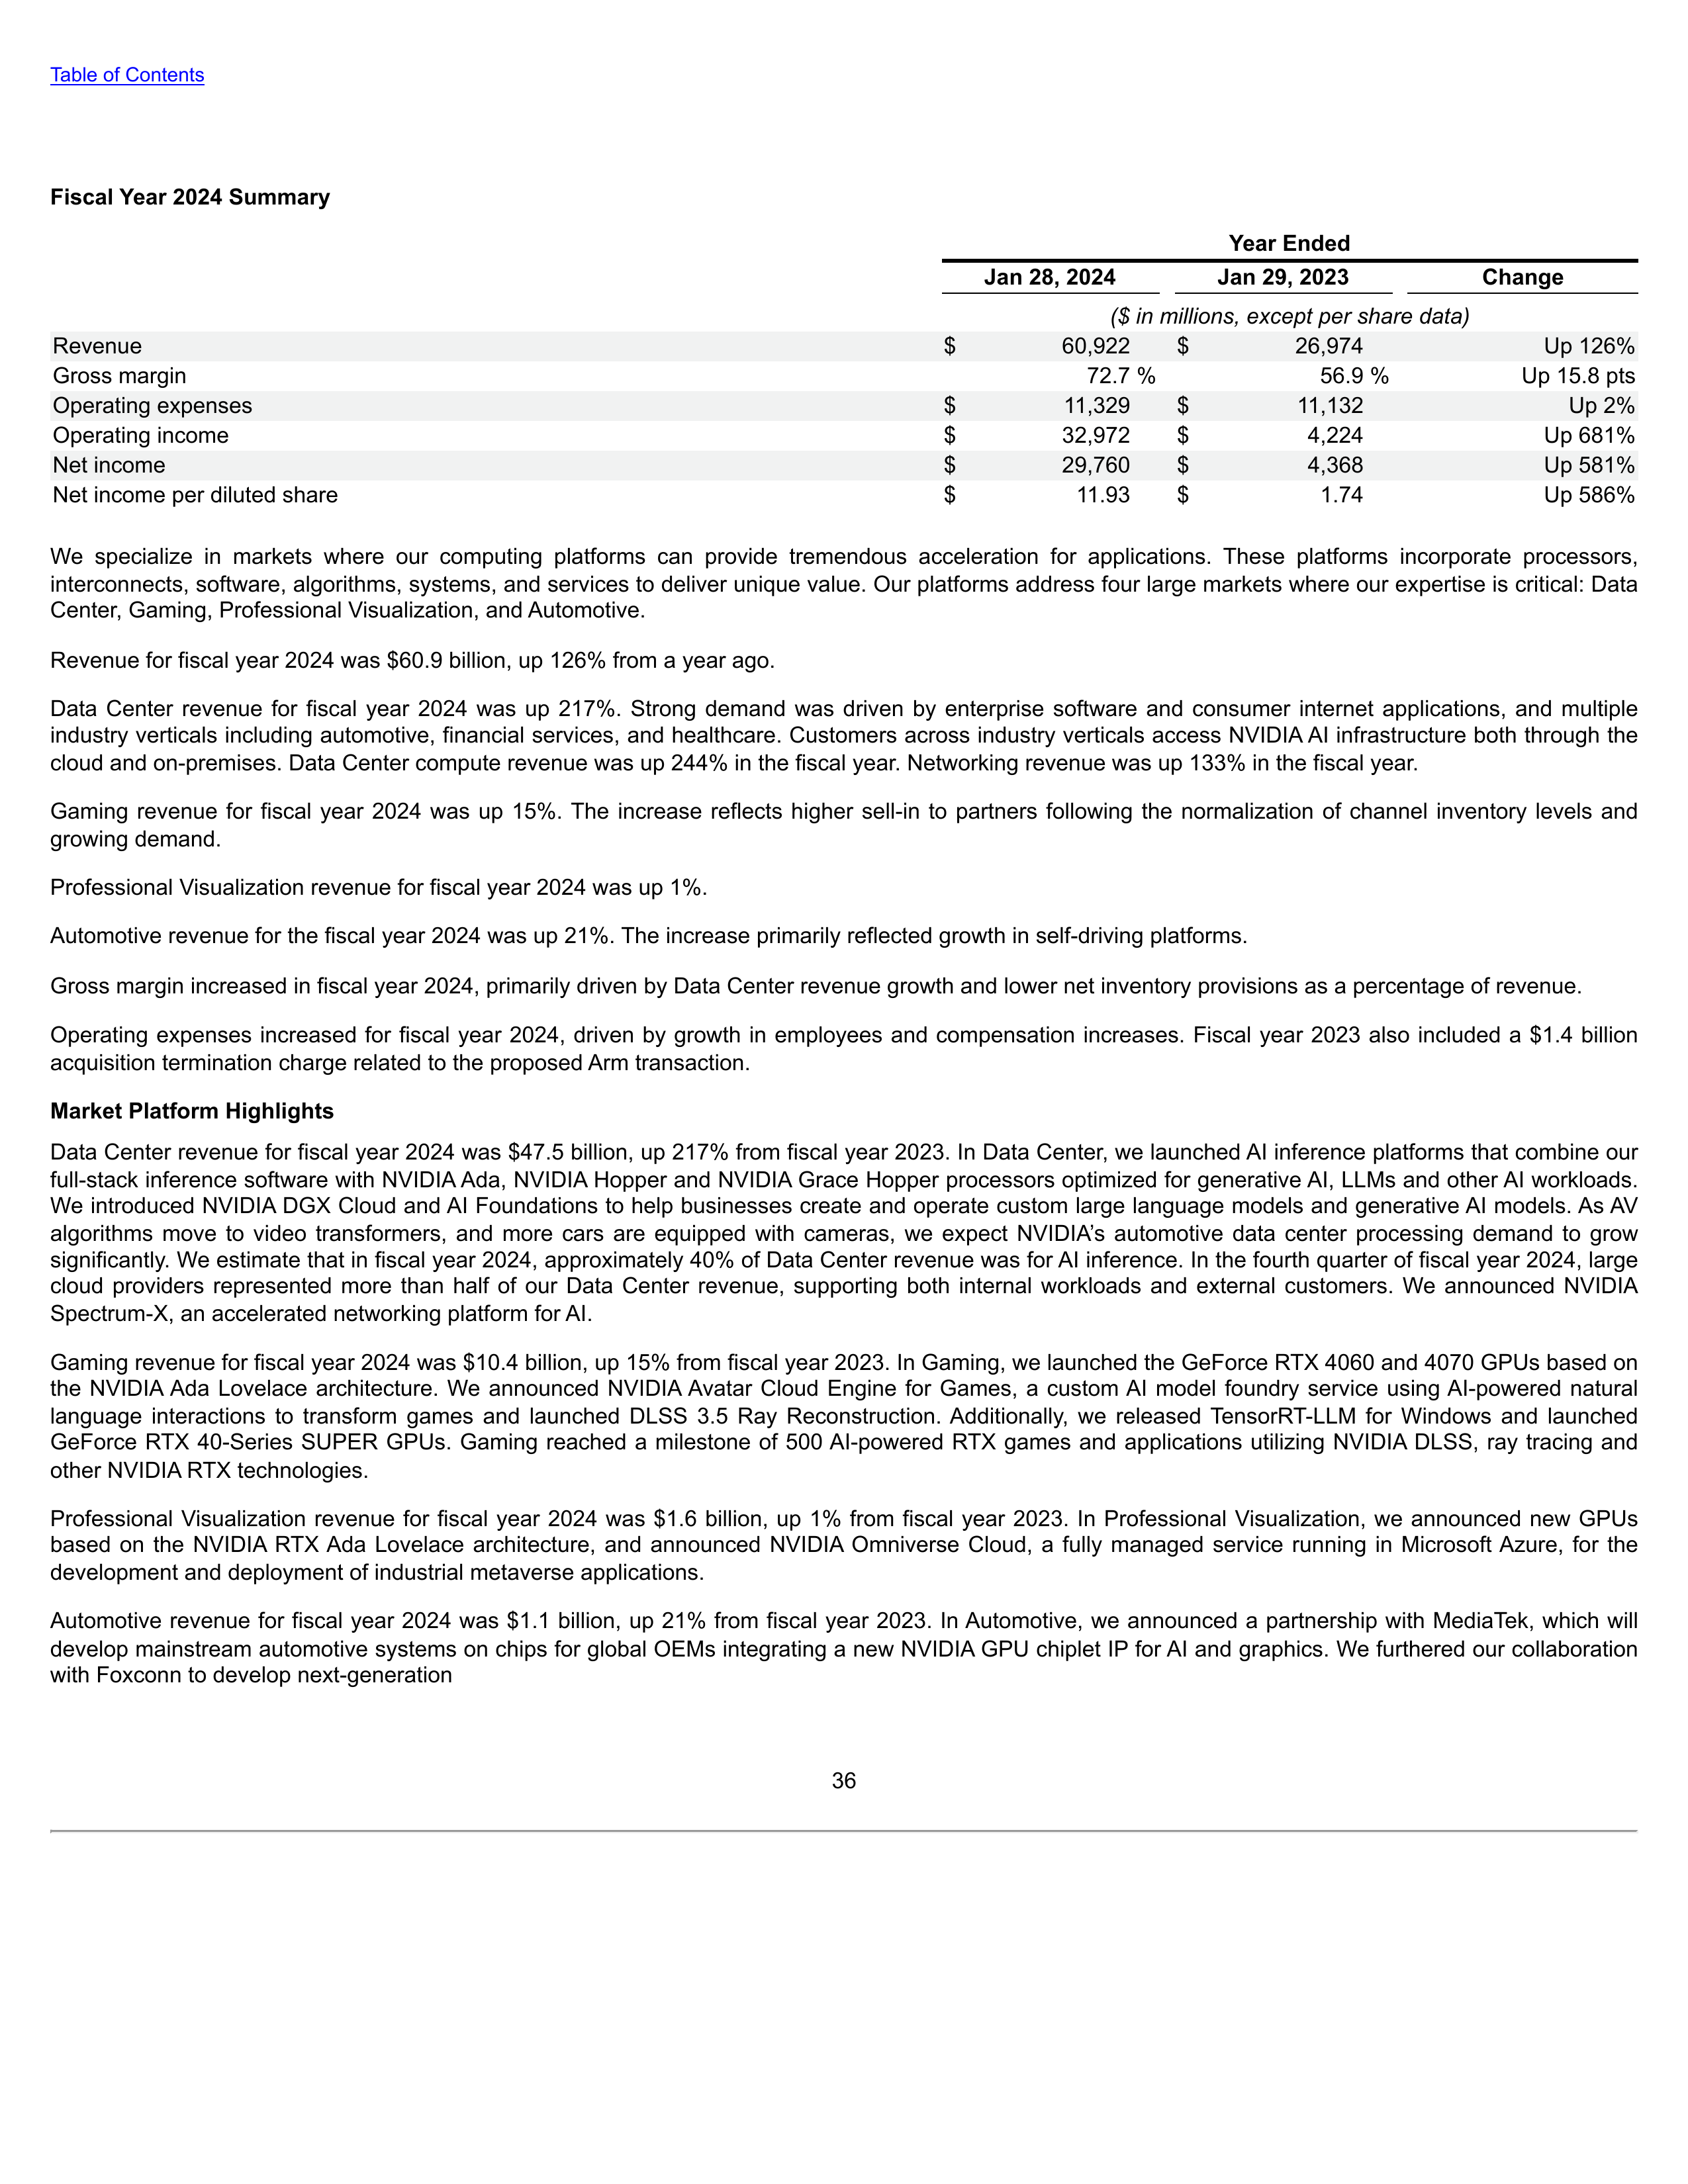

In [ ]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("data/doc_nvidia.pdf", dpi=300)

print("pages:", len(doc_img))
doc_img[35]

In [ ]:
import pytesseract #0.3.10
from tqdm.notebook import tqdm

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)
doc_txt[35]

### Preprocessing

In [ ]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [ ]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1081 = 1081 = 1081


In [ ]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



### LLM Generator

#### TEXT

##### Using `phi3`
La respuesta sí la puede dar en otro idioma auncuando el prompt esté en inglés, por ejemplo. Funcionó con español, francés, alemán e italiano al tiempo, ...

In [ ]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by , "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]

    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print("Summary using phi3 model:\n", keyword_generator(p))

Summary using phi3 model:
 Creative Design, Generative AI, NVIDIA Workstations


In [ ]:
## ORIGINAL
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc) 

In [ ]:
## Print example
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials', 'keywords': 'Revenue Growth, Net Income, Operating Margin'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials', 'keywords': 'revenue up, gross margin up, profit up'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials', 'keywords': "The platform's components are processors, interconnects, software, algorithms, systems, and services, offering unique value in data centers, gaming, professional visualization, and automotive sectors through acceleration for applications."} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, a

#### TABLE

In [ ]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 The table compares the financial results for two consecutive years, ending on January 28 and Jan. 29 of each respective year (Jan 2024 versus Jan. 2023). Revenue has surged by 126%, from $26,974 million to $60,922 million. Gross margin also increased substantially, up 15.8 percentage points from 56.9% to 72.7%. Despite a marginal increase of only 2% in operating expenses (from $11,132 million to $11,329 million), the company's operating income saw an incredible rise by 681%, from $4,224 million to $32,972 million. Net income followed a similar trend with a substantial increase of 581% (from $4,368 million to $29,760 million). When it comes to n

In [ ]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

#### IMAGES

Matplotlib is building the font cache; this may take a moment.


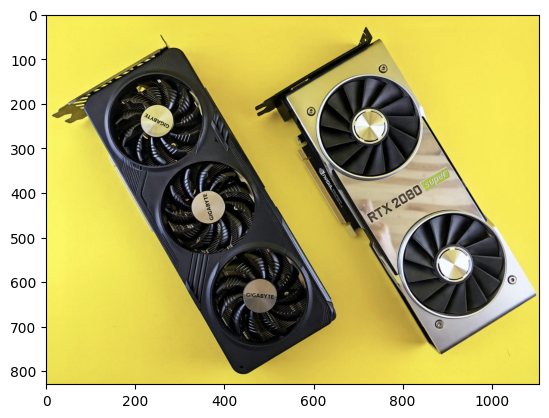

In [ ]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [ ]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [ ]:
prompt = "describe the image"
res = ollama.generate(model="phi3", prompt=prompt, images=[img])["response"]
print(res)

The image depicts a serene sunset over a mountain lake. The sky is painted with warm colors, transitioning from vibrant oranges to deep purples and red hues at the edges where light fades into darkness. A small boat gently bobs on the water's surface amidst ripples caused by an occasional leaf falling onto it. In the foreground lies a dense coniferous forest, its silhouette outlined against the backdrop of dusk sky with faint wisps of mist rolling over nearby hills and creating shadowy patterns around trees that rise in front of the descending sun. The overall mood conveyed is one of tranquility and natural beauty as day turns into night amidst this picturesque landscape.

[img-1]


In [ ]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

#### PLOTS

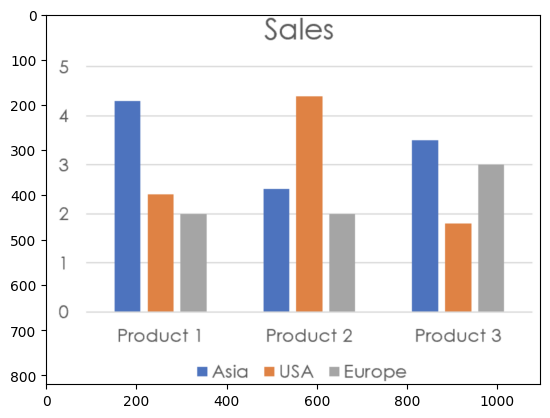

In [ ]:
image_file = "data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [ ]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

### Database

In [ ]:
import chromadb #0.5.0

db = chromadb.PersistentClient(path="/Users/carlos/Docs/projects/GenerativeAI/RAG/chroma")
db.list_collections()

[Collection(name=nvidia)]

In [ ]:
collection_name = "nvidia"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())


collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, 
               images=None, embeddings=None)

collection.peek(1)

En mi mac da este mensaje de error

Fail: [ONNXRuntimeError] : 1 : FAIL : Non-zero status code returned while running CoreML_3403379098192686108_1 node. Name:'CoreMLExecutionProvider_CoreML_3403379098192686108_1_1' Status Message: Error executing model: Unable to compute the prediction using a neural network model. It can be an invalid input data or broken/unsupported model (error code: -1)

Se solucionó adding the items of the lists (docs, ids and metadata) to the collection in a for loop, one item at a time. It didn't raise any error.

In [ ]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'distances': [[0.3877458997610475,
   0.4137847847931928,
   0.6887324452400208,
   0.7076895236968994,
   0.7561168670654297,
   0.7564509510993958,
   0.7685436010360718,
   0.7693564063107363,
   0.8315497636795044,
   0.8593571186065674]],
 'metadatas': [[{'keywords': 'Total revenue (sum of all income)',
    'title': 'Data'},
   {'keywords': 'highest revenue ($60,922); middle revenue ($26,974); lowest revenue ($26,914)',
    'title': 'Data'},
   {'keywords': 'Revenue recognition refers to the process of assigning monetary values to goods or services recognized as income for a period within a year. It involves identifying costs and expenses in generating that income, estimating fair value, and recognizing revenue when performance meets standards.',
    'title': 'Data'},
   {'keywords': 'Sales Revenue, Product, Core Revenue Sources',
    'title': 'Data'},
   {'k

In [ ]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [ ]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the following information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total recognized revenue as mentioned in the information provided stands at $26,914 million (or about $26.9 billion) for fiscal year 2selfy 2024. However, it's worth noting that this figure does not include deferred revenue amounts or revenues related to performance obligations with a contract length of one year or less as they will be recognized in future periods based on the completion of certain milestones and deliveries.


In [ ]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the following additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total reported revenue as per the information provided is $60,922 million (or $60.9 billion). This figure represents the overall earnings before considering deferred and unearned revenues that will be recognized in future periods based on performance obligations. Revenue recognition for these specific items depends on the completion of those services or fulfillment of contract terms, with estimates suggesting around 40% to be realized within the upcoming year following this fiscal cycle ending January 28, 2024.


In [ ]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

The total recognized revenue provided in your information is $26,914 million as of January 28, 2curing fiscal year (FY) 2024 for Dell Technologies. This amount reflects a significant increase from the previous period wherein deferred revenue was also substantial due to customer advances and support obligations that have yet to be recognized in accordance with accounting principles, which are expected to generate $1.1 billion over twelve months following recognition of such as part for performance obligations on longer contracts beyond a year's duration from the fiscal period ending January 28, 2024.